In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


```
function ClickConnect(){
    console.log("코랩 연결 끊김 방지");
    document.querySelector("colab-toolbar-button#connect").click()
    }
    
setInterval(ClickConnect, 300 * 1000) // 300초 마다 함수 실행
```

In [1]:
# 모듈
import os, pathlib
import random

import numpy as np
import pandas as pd

import sklearn as sk

import tensorflow as tf
import keras # tf.keras와 그냥 keras를 혼용 시 문제가 발생할 수 있다(?). 하나로 통일해 주자.
import torch
import torchvision
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

C:\Users\hande\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hande\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hande\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hande\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

AttributeError: module 'tensorflow.python.keras.backend' has no attribute 'get_graph'

In [ ]:
# matplotlib 한글 사용을 위한 폰트 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 59 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm  

mpl.rcParams['axes.unicode_minus'] = False
# 그래프에서 마이너스 폰트 깨질 경우 대비

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild() # 이걸 해줘야 plt.rc가 작동

In [ ]:
# 버전 확인 및 GPU 사용 가능 여부 확인
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print()
print('Scikit-learn: ', sk.__version__)
print()
print('Tensorflow: ', tf.__version__)
print('Keras: ', keras.__version__)
print('torch: ', torch.__version__)
print('torchvision: ', torchvision.__version__)
print('OpenCV: ', cv2.__version__)
print()
print(tf.config.list_physical_devices('GPU'))

Numpy:  1.18.5
Pandas:  1.0.5

Scikit-learn:  0.22.2.post1

Tensorflow:  2.2.0
Keras:  2.3.1
torch:  1.5.1+cu101
torchvision:  0.6.1+cu101
OpenCV:  4.1.2

[]


In [ ]:
# 같은 결과 값을 얻기 위한 seed 고정
random.seed(10)
np.random.seed(10)
tf.random.set_seed(10)
torch.manual_seed(0)
# torch.cuda.manual_seed_all(10) # GPU 상의 torch seed 고정?

In [ ]:
# 작업경로 변경
os.chdir('/content/gdrive/My Drive/Colab Notebooks/ProcessOptim/modified_baseline')

print('Current directory: ', os.getcwd())

Current directory:  /content/gdrive/My Drive/Colab Notebooks/ProcessOptim/modified_baseline


# simulator.py

In [ ]:
from pandas.api.types import is_numeric_dtype
from pathlib import Path

In [ ]:
class Simulator:
    def __init__(self):
        self.sample_submission = pd.read_csv(os.path.join(Path().resolve(), 'module/sample_submission.csv'))
        self.max_count = pd.read_csv(os.path.join(Path().resolve(), 'module/max_count.csv'))
        self.stock = pd.read_csv(os.path.join(Path().resolve(), 'module/stock.csv'))
        order = pd.read_csv(os.path.join(Path().resolve(), 'module/order.csv'), index_col=0)   
        order.index = pd.to_datetime(order.index)
        self.order = order
        
    # 원본 DF 복사 후 time column을 index로 바꾸고 해당 DF 반환
    def subprocess(self, df):
        out = df.copy()
        column = 'time'
        
        out.index = pd.to_datetime(out[column])
        out = out.drop([column], axis=1)
        out.index.name = column
        return out
        
    # 숫자가 있는 공정에 대해 해당 숫자만 추출
    def get_state(self, data):
        if 'CHECK' in data:
            return int(data[-1]) # 예시. CHECK_1 이면 1만 return
        elif 'CHANGE' in data:
            return int(data[-1]) # 예시. CHANGE_14면 4만 return
        else:
            return np.nan # PROCESS와 STOP event에 대해서는 nan
        
    def cal_schedule_part_1(self, df):
        columns = ['PRT_1', 'PRT_2', 'PRT_3', 'PRT_4']
        df_set = df[columns]
        df_out = df_set * 0
        
        p = 0.985
        dt = pd.Timedelta(days=23) # 원형 제작 / 투입 23일 후 생산완료.
        end_time = df_out.index[-1] # 아마 submission.csv 파일의 맨 마지막 날짜를 end_time으로 지정.

        for time in df_out.index:
            out_time = time + dt
            if end_time < out_time: # 위 가정이 맞다면, 투입 23일 후가 end_time보다 크면 의미 없으니 break.
                break
            else:            
                for column in columns:
                    set_num = df_set.loc[time, column] # 특정 날짜(시간)에 해당 PRT 투입량을 set_num으로 지정.
                    if set_num > 0:
                        out_num = np.sum(np.random.choice(2, set_num, p=[1-p, p])) # 양품률 98.5% 반영
                        df_out.loc[out_time, column] = out_num # 23일 후 df_out 데이터프레임에 out_num 입력

        df_out['MOL_1'] = 0.0
        df_out['MOL_2'] = 0.0
        df_out['MOL_3'] = 0.0
        df_out['MOL_4'] = 0.0
        df_out['BLK_1'] = 0.0
        df_out['BLK_2'] = 0.0
        df_out['BLK_3'] = 0.0
        df_out['BLK_4'] = 0.0
        return df_out
        
    def cal_schedule_part_2(self, df, line='A'):
        if line == 'A':
            columns = ['Event_A', 'MOL_A']
        elif line == 'B':
            columns = ['Event_B', 'MOL_B']
        else:
            columns = ['Event_A', 'MOL_A']
            
        schedule = df[columns].copy()
        
        schedule['state'] = 0 # state column 생성
        schedule['state'] = schedule[columns[0]].apply(lambda x: self.get_state(x)) # state column에 get_state 값 넣기
        schedule['state'] = schedule['state'].fillna(method='ffill') # 여기랑
        schedule['state'] = schedule['state'].fillna(0) # 여기는 왜 fillna를 사용했는지 모르겠음.
        # ffill 수행하면 sample_submission.csv의 EVENT_A column에서 73:157이 PROCESS와 STOP과 관계없이 다 4로 채워지지 않나?
        # 아니면 PROCESS만 4로 채워지고 STOP은 0으로 채워지나?
        
        schedule_process = schedule.loc[schedule[columns[0]]=='PROCESS'] # PROCESS EVENT만 추출
        df_out = schedule.drop(schedule.columns, axis=1) # EVENT와 MOL column 삭제
        df_out['PRT_1'] = 0.0
        df_out['PRT_2'] = 0.0
        df_out['PRT_3'] = 0.0
        df_out['PRT_4'] = 0.0
        df_out['MOL_1'] = 0.0
        df_out['MOL_2'] = 0.0
        df_out['MOL_3'] = 0.0
        df_out['MOL_4'] = 0.0

        p = 0.975 # 성형 공정의 양품률
        times = schedule_process.index # PROCESS 공정이 이뤄지는 시간(날짜)만 선택
        for i, time in enumerate(times): # PROCESS 공정 상태에만 대하여
            value = schedule.loc[time, columns[1]] # 해당 시점 PRT_X 투입량(MOL_X를 만들기 위해) 
            state = int(schedule.loc[time, 'state']) # 해당 시점의 상태
            df_out.loc[time, 'PRT_'+str(state)] = -value # 해당 시점에서 MOL_X를 만들기 위해 PRT_X개가 사용되었으므로 차감.
            if i+48 < len(times): # 최소 공정 시간 48시간 조건
                out_time = times[i+48]
                df_out.loc[out_time, 'MOL_'+str(state)] = value*p # 48시간 후 MOL_X의 개수

        df_out['BLK_1'] = 0.0
        df_out['BLK_2'] = 0.0
        df_out['BLK_3'] = 0.0
        df_out['BLK_4'] = 0.0
        return df_out

    # sample_submission과 같은 DF 생성후 첫 행(시작날짜, 2020-04-01 00:00)에 보유량(stock.csv 값) 저장
    def add_stock(self, df, df_stock):
        df_out = df.copy()
        for column in df_out.columns:
            df_out.iloc[0][column] = df_out.iloc[0][column] + df_stock.iloc[0][column]
        return df_out
    
    def order_rescale(self, df, df_order): # 일자별로 작성된 order.csv 파일을 24시간 기준으로 변경 (오후 6시에 납품이 이뤄지도록)
        df_rescale = df.drop(df.columns, axis=1)
        dt = pd.Timedelta(hours=18)
        for column in ['BLK_1', 'BLK_2', 'BLK_3', 'BLK_4']:
            for time in df_order.index:
                df_rescale.loc[time+dt, column] = df_order.loc[time, column]
        df_rescale = df_rescale.fillna(0)
        return df_rescale

    def cal_stock(self, df, df_order):
        df_stock = df * 0

        blk2mol = {}
        blk2mol['BLK_1'] = 'MOL_1'
        blk2mol['BLK_2'] = 'MOL_2'
        blk2mol['BLK_3'] = 'MOL_3'
        blk2mol['BLK_4'] = 'MOL_4'

        cut = {} # MOL_X 당 생성되는 BLK_X 수
        cut['BLK_1'] = 506
        cut['BLK_2'] = 506
        cut['BLK_3'] = 400
        cut['BLK_4'] = 400

        p = {} # 자르기 공정의 양품률
        p['BLK_1'] = 0.851
        p['BLK_2'] = 0.901
        blk_diffs = []
        for i, time in enumerate(df.index):
            month = time.month # BLK_3, BLK_4의 월별 자르기 양품률 반영
            if month == 4:
                p['BLK_3'] = 0.710
                p['BLK_4'] = 0.700
            elif month == 5:
                p['BLK_3'] = 0.742
                p['BLK_4'] = 0.732
            elif month == 6:
                p['BLK_3'] = 0.759
                p['BLK_4'] = 0.749
            else:
                p['BLK_3'] = 0.0
                p['BLK_4'] = 0.0

            if i == 0:
                df_stock.iloc[i] = df.iloc[i] # 4월 1일자 재고량은 그대로 두고
            else:
                df_stock.iloc[i] = df_stock.iloc[i-1] + df.iloc[i] # schedule_1, 2를 통해 나온 df_out의 값들인 PRT_1~4, MOL_1~4의 시간에 따른 변화량(생산량)을 반영
                for column in df_order.columns: # order.csv의 각 column에 대하여 
                    val = df_order.loc[time, column] # 해당 블럭의 수요 (BLK_X)
                    if val > 0: # 수요가 있으면
                        mol_col = blk2mol[column] # 그 블럭에 해당하는 몰드 선택
                        mol_num = df_stock.loc[time, mol_col] # 그 몰드가 몇 개 있는지
                        df_stock.loc[time, mol_col] = 0 # 왜 선택 날짜의 몰드 값을 0으로 만드냐...
                        
                        blk_gen = int(mol_num*p[column]*cut[column]) # 몰드*몰드당 블럭수*양품률
                        blk_stock = df_stock.loc[time, column] + blk_gen # 선택 날짜의 블럭 보유량에 생산량 더하기
                        blk_diff = blk_stock - val # 부족/초과분 = 보유량 - 주문량
                        
                        df_stock.loc[time, column] = blk_diff # 해당 날짜에 부족/초과분 
                        blk_diffs.append(blk_diff) # 부족/초과분 점수 계산을 위해서 list에 추가
        return df_stock, blk_diffs

    def cal_score(self, blk_diffs): # 부족/초과분에 대한 점수 계산
        # Block Order Difference
        blk_diff_m = 0
        blk_diff_p = 0
        for item in blk_diffs:
            if item < 0:
                blk_diff_m = blk_diff_m + abs(item)
            if item > 0:
                blk_diff_p = blk_diff_p + abs(item)
        score = blk_diff_m + blk_diff_p
        return score
    
    def get_score(self, df):
        df = self.subprocess(df)
        out_1 = self.cal_schedule_part_1(df)
        out_2 = self.cal_schedule_part_2(df, line='A')
        out_3 = self.cal_schedule_part_2(df, line='B')
        out = out_1 + out_2 + out_3
        out = self.add_stock(out, self.stock)
        order = self.order_rescale(out, self.order)
        out, blk_diffs = self.cal_stock(out, order)
        score = self.cal_score(blk_diffs)
        return score, out

# genome.py

In [ ]:
from module.simulator import Simulator
simulator = Simulator()

submission_ini = pd.read_csv(os.path.join('./module/', 'sample_submission.csv'))
order_ini = pd.read_csv(os.path.join('./module/', 'order.csv'))

# 파일 호출 확인
# display(submission_ini)
# print()
# display(order_ini)

In [ ]:
class Genome():
    def __init__(self, score_ini, input_len, output_len_1, output_len_2, h1=50, h2=50, h3=50):
        # 평가 점수 초기화
        self.score = score_ini
        
        # 히든레이어 노드 개수
        self.hidden_layer1 = h1
        self.hidden_layer2 = h2
        self.hidden_layer3 = h3
        
        # Event_A 신경망 가중치 생성
        self.w1 = np.random.randn(input_len, self.hidden_layer1)
        self.w2 = np.random.randn(self.hidden_layer1, self.hidden_layer2)
        self.w3 = np.random.randn(self.hidden_layer2, self.hidden_layer3)
        self.w4 = np.random.randn(self.hidden_layer3, output_len_1)
        
        # MOL_A 수량 신경망 가중치 생성
        self.w5 = np.random.randn(input_len, self.hidden_layer1)
        self.w6 = np.random.randn(self.hidden_layer1, self.hidden_layer2)
        self.w7 = np.random.randn(self.hidden_layer2, self.hidden_layer3)
        self.w8 = np.random.randn(self.hidden_layer3, output_len_2)

        # Event_B 신경망 가중치 생성
        self.w9 = np.random.randn(input_len, self.hidden_layer1)
        self.w10 = np.random.randn(self.hidden_layer1, self.hidden_layer2)
        self.w11 = np.random.randn(self.hidden_layer2, self.hidden_layer3)
        self.w12 = np.random.randn(self.hidden_layer3, output_len_1)
        
        # MOL_B 수량 신경망 가중치 생성
        self.w13 = np.random.randn(input_len, self.hidden_layer1)
        self.w14 = np.random.randn(self.hidden_layer1, self.hidden_layer2)
        self.w15 = np.random.randn(self.hidden_layer2, self.hidden_layer3)
        self.w16 = np.random.randn(self.hidden_layer3, output_len_2)       
        
        # Event_A 종류
        self.mask_A = np.zeros([5], np.bool) # 가능한 이벤트 검사용 마스크
        self.event_map = {0:'CHECK_1', 1:'CHECK_2', 2:'CHECK_3', 3:'CHECK_4', 4:'PROCESS'}
        
        self.check_time_A = 28    # 28시간 검사를 완료했는지 검사, CHECK Event시 -1, processtime_time >=98 이면 28
        self.process_A = 0        # 생산 가능 여부, 0 이면 28 시간 검사 필요
        self.process_mode_A = 0   # 생산 물품 번호 1~4, stop시 0
        self.process_time_A = 0   # 생산시간이 얼마나 지속되었는지 검사, PROCESS +1, CHANGE +1, 최대 140

        # Event_B 종류
        self.mask_B = np.zeros([5], np.bool) # 가능한 이벤트 검사용 마스크
        # self.event_map = {0:'CHECK_1', 1:'CHECK_2', 2:'CHECK_3', 3:'CHECK_4', 4:'PROCESS'}
        
        self.check_time_B = 28    # 28시간 검사를 완료했는지 검사, CHECK Event시 -1, processtime_time >=98 이면 28
        self.process_B = 0        # 생산 가능 여부, 0 이면 28 시간 검사 필요
        self.process_mode_B = 0   # 생산 물품 번호 1~4, stop시 0
        self.process_time_B = 0   # 생산시간이 얼마나 지속되었는지 검사, PROCESS +1, CHANGE +1, 최대 140
    
    def update_mask_A(self):
        self.mask_A[:] = False
        if self.process_A == 0: # 생산이 불가능하면, 28시간 검사 필요.
            if self.check_time_A == 28: # 28시간 검사 통과했으면
                self.mask_A[:4] = True # CHECK_1~4까지 True
            if self.check_time_A < 28: # 28시간 검사 통과 못했으면
                self.mask_A[self.process_mode_A] = True # 
        if self.process_A == 1: # 생산 가능
            self.mask_A[4] = True
            if self.process_time_A > 98:
                self.mask_A[:4] = True

    def update_mask_B(self):
        self.mask_B[:] = False
        if self.process_B == 0: # 생산이 불가능하면, 28시간 검사 필요.
            if self.check_time_B == 28: # 28시간 검사 통과했으면
                self.mask_B[:4] = True # CHECK_1~4까지 True
            if self.check_time_B < 28: # 28시간 검사 통과 못했으면
                self.mask_B[self.process_mode_B] = True # 
        if self.process_B == 1: # 생산 가능
            self.mask_B[4] = True
            if self.process_time_B > 98:
                self.mask_B[:4] = True
    
    def forward(self, inputs):
        # Event_A (Line_A) 신경망
        net = np.matmul(inputs, self.w1)
        net = self.linear(net)
        net = np.matmul(net, self.w2)
        net = self.linear(net)
        net = np.matmul(net, self.w3)
        net = self.sigmoid(net)
        net = np.matmul(net, self.w4)
        net = self.softmax(net)
        net += 1
        net = net * self.mask_A
        out1 = self.event_map[np.argmax(net)] # out1은 Event_A를 출력
        
        # MOL_A (Line_A) 수량 신경망
        net = np.matmul(inputs, self.w5)
        net = self.linear(net)
        net = np.matmul(net, self.w6)
        net = self.linear(net)
        net = np.matmul(net, self.w7)
        net = self.sigmoid(net)
        net = np.matmul(net, self.w8)
        net = self.softmax(net)
        out2 = np.argmax(net) # 출력이 12개이니까 0~11까지 중에 하나 선택
        out2 /= 2 # 시간당 최대 투입개수가 140/24 개 니까 최대 5.5개 까지라고 생각. u know what im saying

        # Event_B (Line_B) 신경망
        net = np.matmul(inputs, self.w9)
        net = self.linear(net)
        net = np.matmul(net, self.w10)
        net = self.linear(net)
        net = np.matmul(net, self.w11)
        net = self.sigmoid(net)
        net = np.matmul(net, self.w12)
        net = self.softmax(net)
        net += 1
        net = net * self.mask_B
        out3 = self.event_map[np.argmax(net)] # out3은 Event_B를 출력
        
        # MOL_B (Line_B) 수량 신경망
        net = np.matmul(inputs, self.w13)
        net = self.linear(net)
        net = np.matmul(net, self.w14)
        net = self.linear(net)
        net = np.matmul(net, self.w15)
        net = self.sigmoid(net)
        net = np.matmul(net, self.w16)
        net = self.softmax(net)
        out4 = np.argmax(net) # 출력이 12개이니까 0~11까지 중에 하나 선택
        out4 /= 2 # 시간당 최대 투입개수가 140/24 개 니까 최대 5.5개 까지라고 생각. u know what im saying

        return out1, out2, out3, out4

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)
    
    def linear(self, x):
        return x
    
    def create_order(self, order): # order.csv.에 30일 추가. 아마 시계열 데이터 다루기 위해서라고 추측 함. 맨 마지막 날짜에 대한 input_len=125를 맞춰주기 위해
        for i in range(30):
            order.loc[91+i,:] = ['0000-00-00', 0, 0, 0, 0]
        return order
   
    def predict(self, order):
        order = self.create_order(order)
        self.submission = submission_ini
        self.submission.loc[:, 'PRT_1':'PRT_4'] = 0
        for s in range(self.submission.shape[0]):
            self.update_mask_A()
            self.update_mask_B()
            inputs = np.array(order.loc[s//24:(s//24+30), 'BLK_1':'BLK_4']).reshape(-1)
            inputs = np.append(inputs, s%24)
            out1, out2, out3, out4 = self.forward(inputs)
            
            if out1 == 'CHECK_1':
                if self.process_A == 1:
                    self.process_A = 0
                    self.check_time_A = 28
                self.check_time_A -= 1
                self.process_mode_A = 0
                if self.check_time_A == 0:
                    self.process_A = 1
                    self.process_time_A = 0
            elif out1 == 'CHECK_2':
                if self.process_A == 1:
                    self.process_A = 0
                    self.check_time_A = 28
                self.check_time_A -= 1
                self.process_mode_A = 1
                if self.check_time_A == 0:
                    self.process_A =1
                    self.process_time_A = 0
            elif out1 == 'CHECK_3':
                if self.process_A == 1:
                    self.process_A = 0
                    self.check_time_A = 28
                self.check_time_A -= 1
                self.process_mode_A = 2
                if self.check_time_A == 0:
                    self.process_A = 1
                    self.process_time_A = 0
            elif out1 == 'CHECK_4':
                if self.process_A == 1:
                    self.process_A = 0
                    self.check_time_A = 28
                self.check_time_A -= 1
                self.process_mode_A = 3
                if self.check_time_A == 0:
                    self.process_A = 1
                    self.process_time_A = 0
            elif out1 == 'PROCESS':
                self.process_time_A += 1
                if self.process_time_A == 140:
                    self.process_A = 0
                    self.check_time_A = 28

            if out3 == 'CHECK_1':
                if self.process_B == 1:
                    self.process_B = 0
                    self.check_time_B = 28
                self.check_time_B -= 1
                self.process_mode_B = 0
                if self.check_time_B == 0:
                    self.process_B = 1
                    self.process_time_B = 0
            elif out3 == 'CHECK_2':
                if self.process_B == 1:
                    self.process_B = 0
                    self.check_time_B = 28
                self.check_time_B -= 1
                self.process_mode_B = 1
                if self.check_time_B == 0:
                    self.process_B =1
                    self.process_time_B = 0
            elif out3 == 'CHECK_3':
                if self.process_B == 1:
                    self.process_B = 0
                    self.check_time_B = 28
                self.check_time_B -= 1
                self.process_mode_B = 2
                if self.check_time_B == 0:
                    self.process_B = 1
                    self.process_time_B = 0
            elif out3 == 'CHECK_4':
                if self.process_B == 1:
                    self.process_B = 0
                    self.check_time_B = 28
                self.check_time_B -= 1
                self.process_mode_B = 3
                if self.check_time_B == 0:
                    self.process_B = 1
                    self.process_time_B = 0
            elif out3 == 'PROCESS':
                self.process_time_B += 1
                if self.process_time_B == 140:
                    self.process_B = 0
                    self.check_time_B = 28

            self.submission.loc[s, 'Event_A'] = out1 # Event_A에 대한 결과값을 저장
            if self.submission.loc[s, 'Event_A'] == 'PROCESS': # Event_A 결과가 PROCESS이면
                self.submission.loc[s, 'MOL_A'] = out2 # out2 (A라인에 MOL 투입량)을 저장
            else:
                self.submission.loc[s, 'MOL_A'] = 0 # PROCESS가 아니면 투입을 못하니까 0으로
                
            self.submission.loc[s, 'Event_B'] = out3 # Event_B에 대한 결과값을 저장
            if self.submission.loc[s, 'Event_B'] == 'PROCESS': # Event_B 결과가 PROCESS이면
                self.submission.loc[s, 'MOL_B'] = out4 # out4 (B라인에 MOL 투입량)을 저장
            else:
                self.submission.loc[s, 'MOL_B'] = 0 # PROCESS가 아니면 투입을 못하니까 0으로
                
        # 23일간 MOL = 0
        self.submission.loc[:24*23, 'MOL_A'] = 0 # 왜 23일까지는 투입량을 0으로 해둘까요? -> PRT에서 MOL로 생산하기까지 23일 소요.
        self.submission.loc[:24*23, 'MOL_B'] = 0 # 왜 23일까지는 투입량을 0으로 해둘까요? -> PRT에서 MOL로 생산하기까지 23일 소요.
        
        # A 라인 = B 라인
        # self.submission.loc[:, 'Event_B'] = self.submission.loc[:, 'Event_A']
        # self.submission.loc[:, 'MOL_B'] = self.submission.loc[:, 'MOL_A']
        
        # 변수 초기화
        self.check_time_A = 28
        self.process_A = 0
        self.process_mode_A = 0
        self.process_time_A = 0

        self.check_time_B = 28
        self.process_B = 0
        self.process_mode_B = 0
        self.process_time_B = 0
        
        return self.submission

In [ ]:
def genome_score(genome):
    submission = genome.predict(order_ini)
    genome.submission = submission
    genome.score, _ = simulator.get_score(submission)
    return genome

# main.ipynb

In [ ]:
import multiprocessing
import warnings
from copy import deepcopy
warnings.filterwarnings(action='ignore')

In [ ]:
CPU_CORE = multiprocessing.cpu_count() # 멀티프로세싱 CPU 사용 수
N_POPULATION = 50                      # 세대당 생성수
N_BEST = 5                             # 베스트 수
N_CHILDREN = 5                         # 자손 유전자 수
PROB_MUTATION = 0.5                    # 돌연변이
REVERSE = False                        # 배열 순서 (False: ascending order, True: descending order)

score_ini = 1e8                        # 초기 점수
input_length = 125                     # 입력 데이터 길이
output_length_1 = 5                    # Event (CHECK_1~4, PROCESS)
output_length_2 = 12                   # MOL(0~5.5, step:0.5)
h1 = 50                                # 히든레이어1 노드 수
h2 = 50                                # 히든레이어2 노드 수
h3 = 50                                # 히든레이어3 노드 수
EPOCHS = 10                            # 반복 횟수

genomes = []
for _ in range(N_POPULATION):
    genome = Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3)
    genomes.append(genome)
try:
    for i in range(N_BEST):
        genomes[i] = best_genomes[i]
except:
    best_genomes = []
    for _ in range(5):
        genome = Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3)
        best_genomes.append(genome)

### 5. 모델 학습 및 검증
### Model Tuning & Evaluation
1. PRT는 고정값 사용
2. Event A, Event B (MOL_A, MOL_B) 를 같은 값으로 제한
3. Event는 CHECK와 PROCESS 만 사용함
4. 목적 함수로 수요 부족분만 고려함
5. Event와 MOL에 대해 인공신경망 모델을 만들어 유전 알고리즘으로 학습

In [ ]:
n_gen = 1
score_history = []
high_score_history = []
mean_score_history = []
while n_gen <= EPOCHS:    
    genomes = np.array(genomes)
    while len(genomes)%CPU_CORE != 0:
        genomes = np.append(genomes, Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3))
    genomes = genomes.reshape((len(genomes)//CPU_CORE, CPU_CORE))
    
    for idx, _genomes in enumerate(genomes):
        if __name__ == '__main__':
            pool = multiprocessing.Pool(processes=CPU_CORE)
            genomes[idx] = pool.map(genome_score, _genomes)
            pool.close()
            pool.join()
    genomes = list(genomes.reshape(genomes.shape[0]*genomes.shape[1]))      
    
     # score에 따라 정렬
    genomes.sort(key=lambda x: x.score, reverse=REVERSE)
    
    # 평균 점수
    s = 0
    for i in range(N_BEST):
        s += genomes[i].score
    s /= N_BEST
    
    # Best Score
    bs = genomes[0].score
    
    # Best Model 추가
    if best_genomes is not None:
        genomes.extend(best_genomes)
        
    # score에 따라 정렬
    genomes.sort(key=lambda x: x.score, reverse=REVERSE)
    
    score_history.append([n_gen, genomes[0].score])
    high_score_history.append([n_gen, bs])
    mean_score_history.append([n_gen, s])
    
    # 결과 출력
    print('EPOCH #%s\tHistory Best Score: %s\tBest Score: %s\tMean Score: %s' % (n_gen, genomes[0].score, bs, s))
    
    # 모델 업데이트
    best_genomes = deepcopy(genomes[:N_BEST])
    
    # CHILDREN 생성
    for i in range(N_CHILDREN):
        new_genome = deepcopy(best_genomes[0])
        a_genome = np.random.choice(best_genomes)
        b_genome = np.random.choice(best_genomes)
        
        for j in range(input_length):
            cut = np.random.randint(new_genome.w1.shape[1])
            new_genome.w1[j, :cut] = a_genome.w1[j, :cut]
            new_genome.w1[j, cut:] = b_genome.w1[j, cut:]
        
        for j in range(h1):
            cut = np.random.randint(new_genome.w2.shape[1])
            new_genome.w2[j, :cut] = a_genome.w2[j, :cut]
            new_genome.w2[j, cut:] = b_genome.w2[j, cut:]
        
        for j in range(h2):
            cut = np.random.randint(new_genome.w3.shape[1])
            new_genome.w3[j, :cut] = a_genome.w3[j, :cut]
            new_genome.w3[j, cut:] = b_genome.w3[j, cut:]
        
        for j in range(h3):
            cut = np.random.randint(new_genome.w4.shape[1])
            new_genome.w4[j, :cut] = a_genome.w4[j, :cut]
            new_genome.w4[j, cut:] = b_genome.w4[j, cut:]
            
        for j in range(input_length):
            cut = np.random.randint(new_genome.w5.shape[1])
            new_genome.w5[j, :cut] = a_genome.w5[j, :cut]
            new_genome.w5[j, cut:] = b_genome.w5[j, cut:]
        
        for j in range(h1):
            cut = np.random.randint(new_genome.w6.shape[1])
            new_genome.w6[j, :cut] = a_genome.w6[j, :cut]
            new_genome.w6[j, cut:] = b_genome.w6[j, cut:]
        
        for j in range(h2):
            cut = np.random.randint(new_genome.w7.shape[1])
            new_genome.w7[j, :cut] = a_genome.w7[j, :cut]
            new_genome.w7[j, cut:] = b_genome.w7[j, cut:]
        
        for j in range(h3):
            cut = np.random.randint(new_genome.w8.shape[1])
            new_genome.w8[j, :cut] = a_genome.w8[j, :cut]
            new_genome.w8[j, cut:] = b_genome.w8[j, cut:]
        
        best_genomes.append(new_genome)
    
    # 모델 초기화
    genomes = []
    for i in range(int(N_POPULATION / len(best_genomes))):
        for bg in best_genomes:
            new_genome = deepcopy(bg)            
            mean = 0
            stddev = 0.2                        
            # 50% 확률로 모델 변형
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w1 += new_genome.w1 * np.random.normal(mean, stddev, size=(input_length, h1)) * np.random.randint(0, 2, (input_length, h1))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w2 += new_genome.w2 * np.random.normal(mean, stddev, size=(h1, h2)) * np.random.randint(0, 2, (h1, h2))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w3 += new_genome.w3 * np.random.normal(mean, stddev, size=(h2, h3)) * np.random.randint(0, 2, (h2, h3))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w4 += new_genome.w4 * np.random.normal(mean, stddev, size=(h3, output_length_1)) * np.random.randint(0, 2, (h3, output_length_1))                
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w5 += new_genome.w5 * np.random.normal(mean, stddev, size=(input_length, h1)) * np.random.randint(0, 2, (input_length, h1))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w6 += new_genome.w6 * np.random.normal(mean, stddev, size=(h1, h2)) * np.random.randint(0, 2, (h1, h2))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w7 += new_genome.w7 * np.random.normal(mean, stddev, size=(h2, h3)) * np.random.randint(0, 2, (h2, h3))
            if np.random.uniform(0, 1) < PROB_MUTATION:
                new_genome.w8 += new_genome.w8 * np.random.normal(mean, stddev, size=(h3, output_length_2)) * np.random.randint(0, 2, (h3, output_length_2))
            genomes.append(new_genome)
            
    if REVERSE:
        if bs < score_ini:
            genomes[len(genomes)//2:] = [Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3) for _ in range(N_POPULATION//2)]
    else:
        if bs > score_ini:
            genomes[len(genomes)//2:] = [Genome(score_ini, input_length, output_length_1, output_length_2, h1, h2, h3) for _ in range(N_POPULATION//2)]  
        
    n_gen += 1

PicklingError: ignored

### 결과 그래프

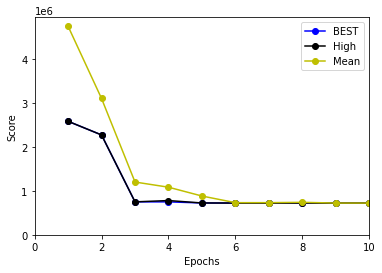

In [ ]:
# Score Graph
score_history = np.array(score_history)
high_score_history = np.array(high_score_history)
mean_score_history = np.array(mean_score_history)

plt.plot(score_history[:,0], score_history[:,1], 'b-o', label='BEST')
plt.plot(high_score_history[:,0], high_score_history[:,1], 'k-o', label='High')
plt.plot(mean_score_history[:,0], mean_score_history[:,1], 'y-o', label='Mean')
plt.legend()
plt.xlim(0, EPOCHS)
plt.ylim(bottom=0)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

### Submission 파일 만들기

In [ ]:
# 재고 계산
from module.simulator import Simulator
simulator = Simulator()
order = pd.read_csv('./module/order.csv')
submission = best_genomes[0].predict(order)
_, df_stock = simulator.get_score(submission) 

# PRT 개수 계산
PRTs = df_stock[['PRT_1', 'PRT_2', 'PRT_3', 'PRT_4']].values
PRTs = (PRTs[:-1] - PRTs[1:])[24*23:]
PRTs = np.ceil(PRTs * 1.1)
PAD = np.zeros((24*23+1, 4))
PRTs = np.append(PRTs, PAD, axis=0).astype(int)

# Submission 파일에 PRT 입력
submission.loc[:, 'PRT_1':'PRT_4'] = PRTs
SUBMISSION_DIR = os.path.join(Path().resolve().parent, 'submission')
submission.to_csv(SUBMISSION_DIR+'/200622_ipynb test.csv', index=False)